In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error as mse
 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

(0.0, 800000.0)

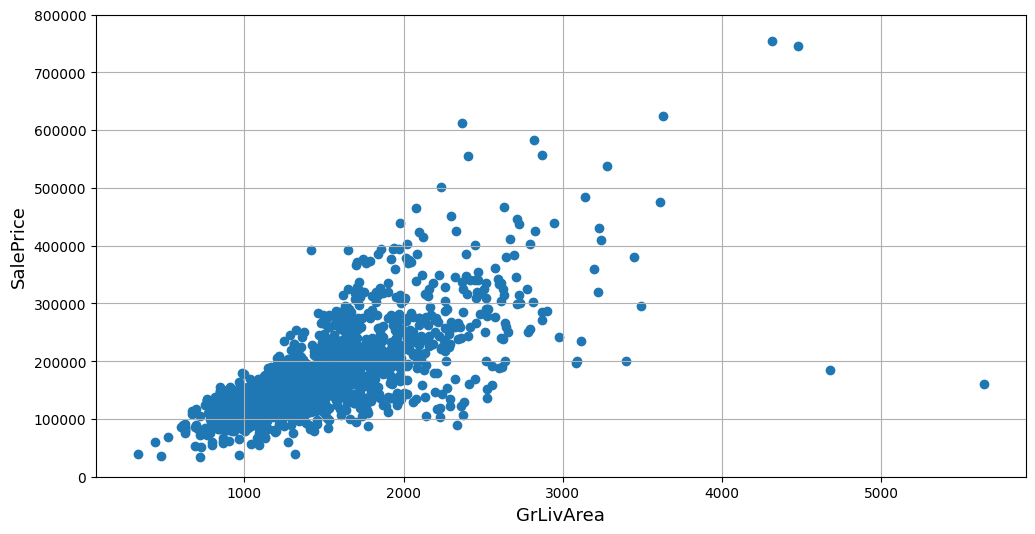

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(x=train.GrLivArea, y=train.SalePrice)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.grid()
plt.ylim(0,800000)

In [17]:
train.drop(train[(train["GrLivArea"]>3000)&(train["SalePrice"]<400000)].index,inplace=True)

df=pd.concat([train,test], ignore_index=True)
df.drop(['Id','SalePrice'], axis=1, inplace=True)

cols1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "GarageYrBlt", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]
for col in cols1:
    df[col].fillna("None", inplace=True)

cols2 = ["MSZoning", "BsmtFullBath", "BsmtHalfBath", "Utilities", "Functional", "Electrical", "KitchenQual", "SaleType","Exterior1st", "Exterior2nd"]
for col in cols2:
    df[col].fillna(df[col].mode()[0], inplace=True)

cols=["MasVnrArea", "BsmtUnfSF", "TotalBsmtSF", "GarageCars", "BsmtFinSF2", "BsmtFinSF1", "GarageArea"]
for col in cols:
    df[col].fillna(0, inplace=True)

df['LotFrontage']=df.groupby(['Neighborhood'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [18]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object
HeatingQC         object


In [ ]:
def map_values():
    df["MSSubClass"]=df["MSSubClass"].astype(str)
    df["MSSubClass"] = df.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
    df["MSZoning"] = df.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
    df["Neighborhood"] = df.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    df["Condition1"] = df.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    df["BldgType"] = df.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    df["HouseStyle"] = df.HouseStyle.map({'1Story':1,
                                            '1.5Unf':2, '1.5Fin':2,
                                            '2Story':3,
                                            '2.5Unf':4, '2.5Fin':4, 
                                            'SFoyer':5,'SLvl':5,})
    
    df["Exterior1st"] = df.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    df["MasVnrType"] = df.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    df["ExterQual"] = df.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    df["Foundation"] = df.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    df["BsmtQual"] = df.BsmtQual.map({'Fa':2, 'None':1, 'TA':3, 'Gd':4, 'Ex':5})
    
    df["BsmtExposure"] = df.BsmtExposure.map({'None':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    df["Heating"] = df.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    df["HeatingQC"] = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    df["KitchenQual"] = df.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    df["Functional"] = df.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    df["FireplaceQu"] = df.FireplaceQu.map({'None':1, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    df["GarageType"] = df.GarageType.map({'CarPort':1, 'None':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    df["GarageFinish"] = df.GarageFinish.map({'None':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    df["PavedDrive"] = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    df["SaleType"] = df.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    df["SaleCondition"] = df.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            

map_values()

In [21]:
# 1. 面积组合特征 (10个)
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
df['BsmtFinTotal'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df['OutdoorArea'] = df['WoodDeckSF'] + df['TotalPorchSF'] + df['PoolArea']
df['TotalRoomArea'] = df['GrLivArea'] / (df['TotRmsAbvGrd'] + 1e-6)
df['GarageAreaPerCar'] = np.where(df['GarageCars'] > 0, df['GarageArea'] / df['GarageCars'], 0)
df['LotDensity'] = df['LotArea'] / (df['LotFrontage'] + 1e-6)
df['MasonryAreaRatio'] = df['MasVnrArea'] / (df['LotArea'] + 1e-6)
df['FirstFloorRatio'] = df['1stFlrSF'] / (df['GrLivArea'] + 1e-6)

# 2. 质量与条件组合特征 (10个)
df['OverallScore'] = df['OverallQual'] * df['OverallCond']
df['ExterScore'] = df['ExterQual'] * df['ExterQual']  # 平方强化
df['KitchenScore'] = df['KitchenQual'] * df['KitchenQual']
df['BsmtQualityScore'] = df['BsmtQual'] * df['BsmtExposure']
df['GarageScore'] = df['GarageFinish'] * df['GarageCars']
df['FireplaceScore'] = df['Fireplaces'] * df['FireplaceQu']
df['HeatingScore'] = df['HeatingQC'] * df['OverallCond']
df['ConditionPenalty'] = np.where(df['OverallCond'] < 5, 5 - df['OverallCond'], 0)
df['FunctionalPenalty'] = np.select(
    [df['Functional'] == 1, 
     (df['Functional'] == 2) | (df['Functional'] == 3),
     df['Functional'] == 4,
     df['Functional'] >= 5],
    [0, 1, 2, 3]
)
df['TotalQualityScore'] = df['OverallQual'] + df['ExterQual'] + df['KitchenQual'] + df['BsmtQual']

# 3. 时间与年龄特征 (10个)
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodelAge'] = df['YrSold'] - df['YearRemodAdd']
df['AgeSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']
df['IsNewHouse'] = (df['HouseAge'] == 0).astype(int)
df['RecentRemodel'] = (df['RemodelAge'] <= 5).astype(int)
df['SoldInSummer'] = df['MoSold'].between(6, 8).astype(int)
df['SoldInWinter'] = df['MoSold'].isin([12, 1, 2]).astype(int)
df['BuildingDecade'] = (df['YearBuilt'] // 10) * 10
df['RemodelDecade'] = (df['YearRemodAdd'] // 10) * 10
df['SeasonalSale'] = df['MoSold'] * df['YrSold']  # 组合月份和年份

# 4. 比率特征 (10个)
df['LivingAreaRatio'] = df['GrLivArea'] / (df['TotalSF'] + 1e-6)
df['BasementRatio'] = df['TotalBsmtSF'] / (df['TotalSF'] + 1e-6)
df['BsmtFinRatio'] = df['BsmtFinTotal'] / (df['TotalBsmtSF'] + 1e-6)
df['UnfinishedBsmtRatio'] = df['BsmtUnfSF'] / (df['TotalBsmtSF'] + 1e-6)
df['RoomBathRatio'] = df['TotRmsAbvGrd'] / (df['TotalBath'] + 1e-6)
df['BathroomPerBedroom'] = df['TotalBath'] / (df['BedroomAbvGr'] + 1e-6)
df['LotFrontageRatio'] = df['LotFrontage'] / (df['LotArea'] + 1e-6)
df['PorchToAreaRatio'] = df['TotalPorchSF'] / (df['LotArea'] + 1e-6)
df['DeckPorchRatio'] = df['WoodDeckSF'] / (df['TotalPorchSF'] + 1e-6)
df['GarageToAreaRatio'] = df['GarageArea'] / (df['LotArea'] + 1e-6)

# 5. 存在性特征 (10个)
df['HasPool'] = (df['PoolArea'] > 0).astype(int)
df['HasFireplace'] = (df['Fireplaces'] > 0).astype(int)
df['Has2ndFloor'] = (df['2ndFlrSF'] > 0).astype(int)
df['HasBasement'] = (df['TotalBsmtSF'] > 0).astype(int)
df['HasFinishedBasement'] = (df['BsmtFinSF1'] > 0).astype(int)
df['HasMasonry'] = (df['MasVnrArea'] > 0).astype(int)
df['HasPorch'] = (df['TotalPorchSF'] > 0).astype(int)
df['HasDeck'] = (df['WoodDeckSF'] > 0).astype(int)
df['HasGarage'] = (df['GarageArea'] > 0).astype(int)
df['IsMultiStory'] = (df['HouseStyle'] >= 3).astype(int)  # 假设编码: 1层=1, 1.5层=2, 2层=3等

# 处理可能的除零错误
ratio_features = ['TotalRoomArea', 'LotDensity', 'MasonryAreaRatio', 'FirstFloorRatio',
                 'LivingAreaRatio', 'BasementRatio', 'BsmtFinRatio', 'UnfinishedBsmtRatio',
                 'RoomBathRatio', 'BathroomPerBedroom', 'LotFrontageRatio', 'PorchToAreaRatio',
                 'DeckPorchRatio', 'GarageToAreaRatio']

for col in ratio_features:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    df[col] = df[col].fillna(0)

In [22]:
from sklearn.preprocessing import RobustScaler

df=pd.get_dummies(df)
columns=df.columns

df=RobustScaler().fit_transform(df)

In [24]:
y=train['SalePrice']
y_log=np.log(y)
x=df[:train.shape[0]]
test=df[train.shape[0]:]

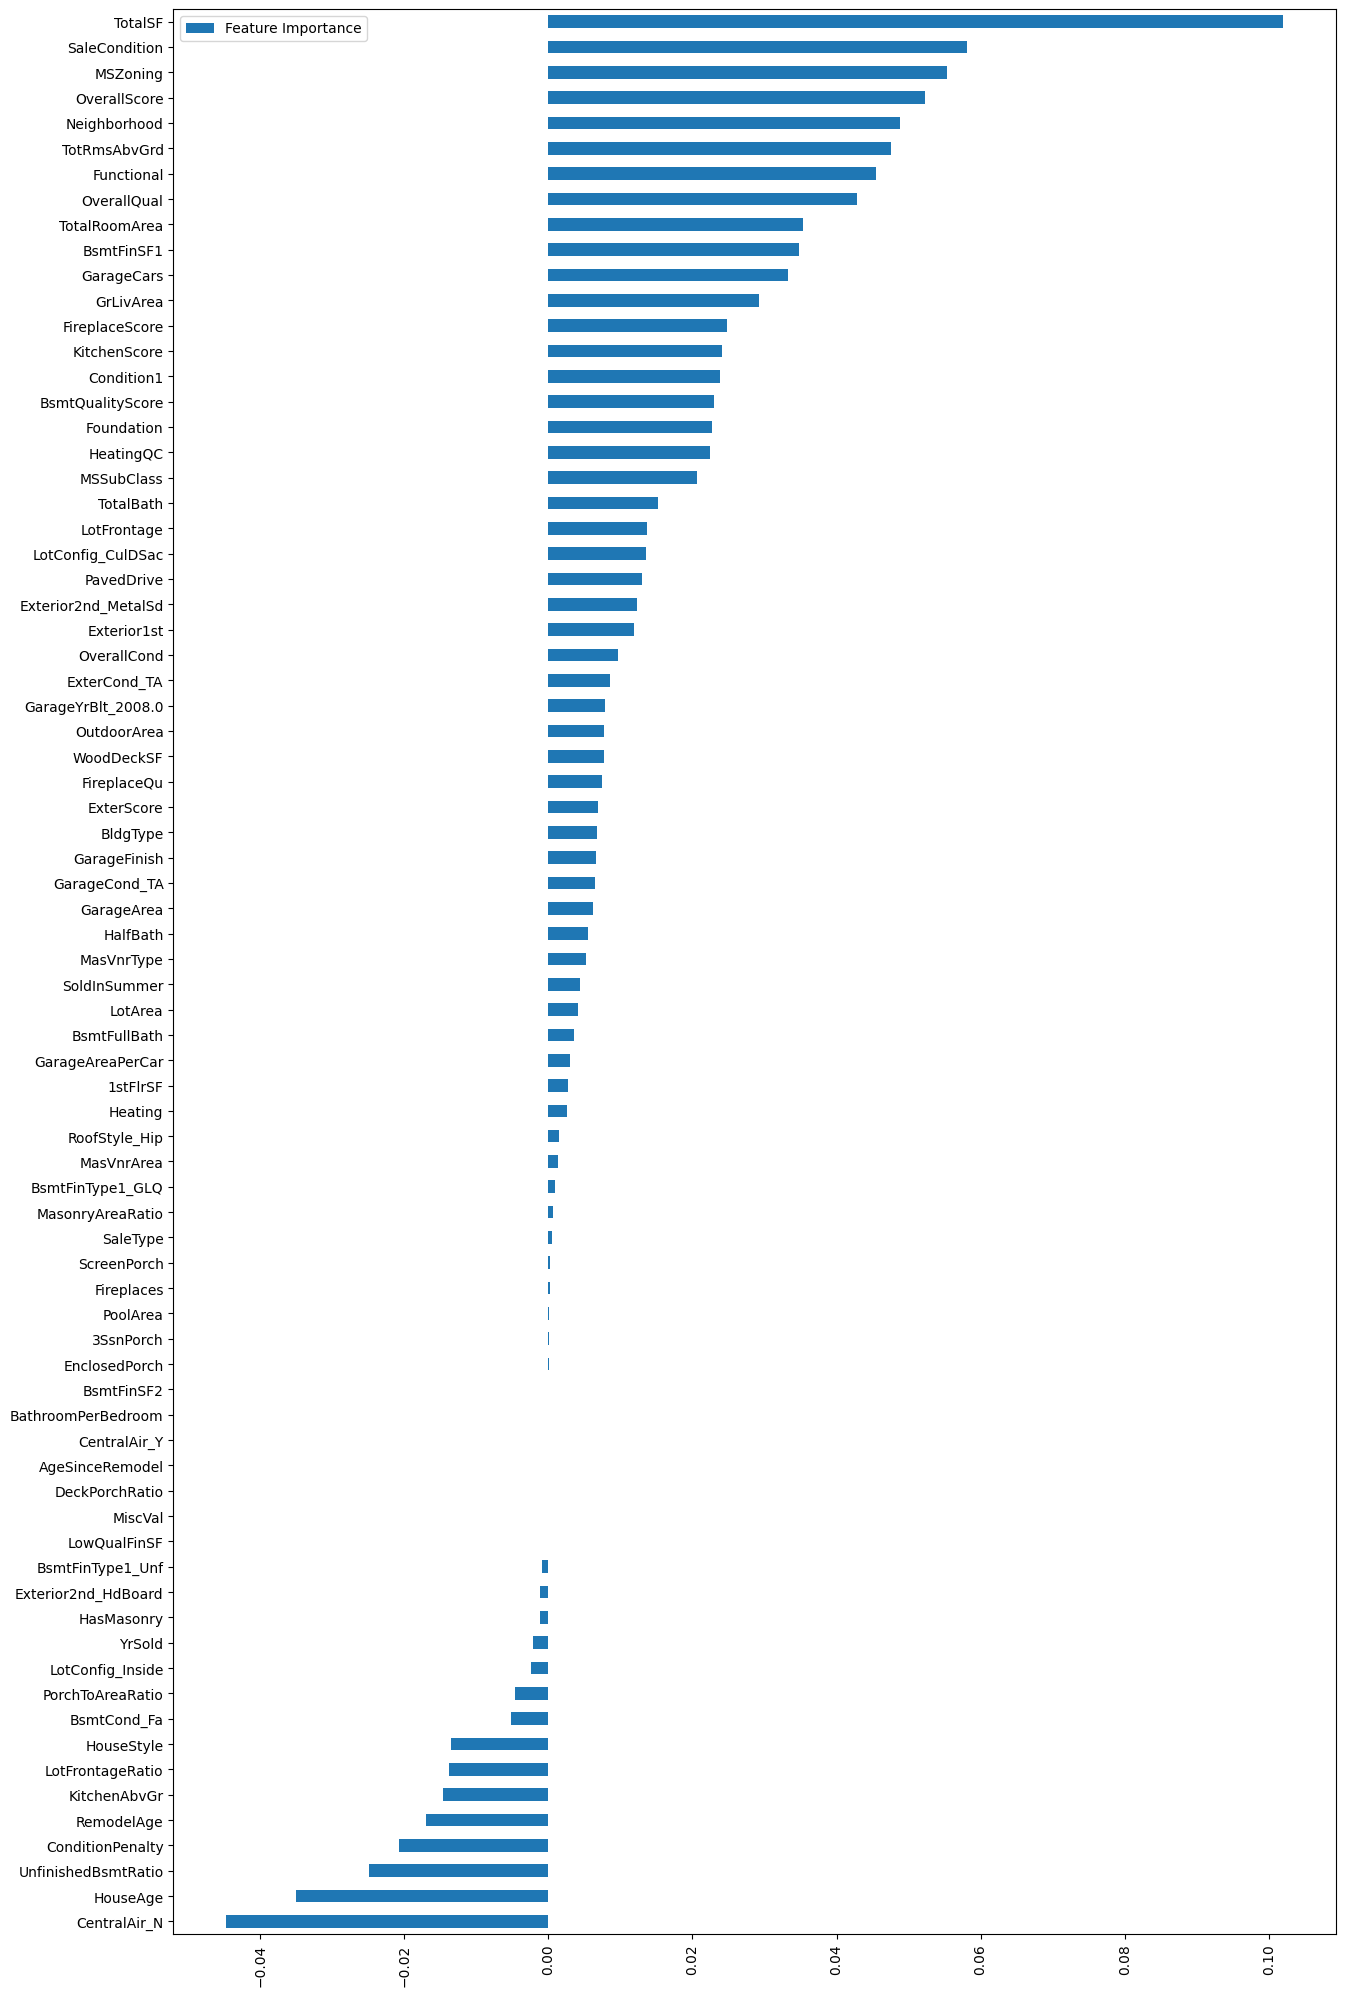

In [25]:
lasso=Lasso(alpha=0.001)
lasso.fit(x,y_log)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=columns)
FI_lasso.sort_values("Feature Importance",ascending=False)
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [26]:
from sklearn.decomposition import PCA
pca=PCA()
x=pca.fit_transform(x)
test=pca.transform(test)

In [27]:
x.shape

(1450, 327)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y_log,test_size=0.2,shuffle=True)

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

models = [LinearRegression(),Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),LinearSVR(),
          ElasticNet(alpha=0.001,max_iter=10000),SGDRegressor(max_iter=1000,tol=1e-3),BayesianRidge(),KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]
for m in models:
    m.fit(x_train,y_train)
    print(m.__class__.__name__)
    print(mse(y_train,m.predict(x_train)))
    print(mse(y_test,m.predict(x_test)))

LinearRegression
0.00823443225786321
0.014169013722169955
Ridge
0.008494758124079753
0.012113169825006743
Lasso
0.015409058700918066
0.012890165592917786


c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.37885e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


RandomForestRegressor
0.0038610323257819604
0.02492654102914941
GradientBoostingRegressor
0.005427597996872337
0.019312700183070006
SVR
0.15565532862256523
0.15820884375418923


c:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


LinearSVR
1448.9585379465896
1512.6349541842285
ElasticNet
0.010714649974417881
0.010688491343005393
SGDRegressor
2.4150419656866666e+48
3.1070931853313655e+48
BayesianRidge
0.01020834096611072
0.010557158644774583
KernelRidge
78.79119305933808
86.31103872848328
ExtraTreesRegressor
2.0876795825171375e-28
0.02359773686621226
XGBRegressor
1.508937798158109e-07
0.025664269943604313


In [37]:
m=BayesianRidge()
m.fit(x_train,y_train)
print(mse(y_train,m.predict(x_train)))
print(mse(y_test,m.predict(x_test)))

ans=np.exp(m.predict(test))
ans_df=pd.DataFrame({'Id':range(1461,2920),'SalePrice':ans})
ans_df.to_csv('ans.csv',index=False)

0.01020834096611072
0.010557158644774583


In [4]:
from autogluon.tabular import TabularDataset, TabularPredictor

predictor = TabularPredictor(label='SalePrice').fit(
    train_data=train,
    time_limit=7200,
    presets='best',
    num_bag_folds=5,
    num_bag_sets=1,
    num_stack_levels=1,
)

leaderboard = predictor.leaderboard()
predictions = predictor.predict(test)

ans_df=pd.DataFrame({'Id':test['Id'],'SalePrice':predictions})
ans_df.to_csv('autogluon_submission.csv',index=False)

No path specified. Models will be saved in: "AutogluonModels\ag-20250915_093115"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.10.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
CPU Count:          20
Memory Avail:       48.31 GB / 63.86 GB (75.7%)
Disk Space Avail:   84.79 GB / 464.50 GB (18.3%)
Presets specified: ['best']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify t

[1000]	valid_set's rmse: 27414.1
[1000]	valid_set's rmse: 26520.1
[2000]	valid_set's rmse: 26479.5
[3000]	valid_set's rmse: 26467.9
[4000]	valid_set's rmse: 26465
[5000]	valid_set's rmse: 26463.9
[6000]	valid_set's rmse: 26463.8
[1000]	valid_set's rmse: 28827.4
[2000]	valid_set's rmse: 28658.2
[3000]	valid_set's rmse: 28627.1
[4000]	valid_set's rmse: 28618.6
[5000]	valid_set's rmse: 28617.6
[6000]	valid_set's rmse: 28617.4
[7000]	valid_set's rmse: 28617.4
[8000]	valid_set's rmse: 28617.4
[9000]	valid_set's rmse: 28617.4


	-25828.8244	 = Validation score   (-root_mean_squared_error)
	30.34s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1163.54s of the 1763.61s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)


[1000]	valid_set's rmse: 28409.8
[2000]	valid_set's rmse: 28220.8
[3000]	valid_set's rmse: 28174.3
[4000]	valid_set's rmse: 28157.9
[5000]	valid_set's rmse: 28156.4
[6000]	valid_set's rmse: 28156.1
[7000]	valid_set's rmse: 28156
[8000]	valid_set's rmse: 28156
[9000]	valid_set's rmse: 28156
[10000]	valid_set's rmse: 28156


	-26383.4305	 = Validation score   (-root_mean_squared_error)
	21.02s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 1141.55s of the 1741.62s of remaining time.
	-29293.2828	 = Validation score   (-root_mean_squared_error)
	2.69s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 1138.58s of the 1738.66s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	Ran out of time, early stopping on iteration 4651.
	-26019.4797	 = Validation score   (-root_mean_squared_error)
	884.68s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 253.70s of the 853.77s of remaining time.
	-29331.0347	 = Validation score   (-root_mean_squared_error)
	0.46s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetF

[1000]	valid_set's rmse: 27915.7
[2000]	valid_set's rmse: 27573.7
[3000]	valid_set's rmse: 27418.3
[4000]	valid_set's rmse: 27304.5
[5000]	valid_set's rmse: 27232.3
[6000]	valid_set's rmse: 27191.2
[7000]	valid_set's rmse: 27154
[8000]	valid_set's rmse: 27133.3
[9000]	valid_set's rmse: 27118.4
[10000]	valid_set's rmse: 27105


	-26021.7233	 = Validation score   (-root_mean_squared_error)
	19.15s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 30.88s of the 630.95s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
No improvement since epoch 19: early stopping
	-31569.9947	 = Validation score   (-root_mean_squared_error)
	15.65s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_r9_BAG_L1 ... Training model for up to 15.04s of the 615.12s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	Ran out of time, early stopping on iteration 35.
	Ran out of time, early stopping on iteration 38.
	Ran out of time, early stopping on iteration 41.
	Ran out of time, early stopping on iteration 45.
	Ran out of time, early stopping on iteration 55.
	-43055.1

[1000]	valid_set's rmse: 25556.9
[2000]	valid_set's rmse: 25185.7
[3000]	valid_set's rmse: 25124.6
[4000]	valid_set's rmse: 25109.5
[5000]	valid_set's rmse: 25105.5
[6000]	valid_set's rmse: 25104.7
[7000]	valid_set's rmse: 25104.6
[8000]	valid_set's rmse: 25104.6
[9000]	valid_set's rmse: 25104.6
[10000]	valid_set's rmse: 25104.6
[1000]	valid_set's rmse: 34921.1
[2000]	valid_set's rmse: 34607.5
[3000]	valid_set's rmse: 34558.9
[4000]	valid_set's rmse: 34552.4
[5000]	valid_set's rmse: 34551.8
[6000]	valid_set's rmse: 34551.7
[7000]	valid_set's rmse: 34551.6
[8000]	valid_set's rmse: 34551.6
[9000]	valid_set's rmse: 34551.6
[10000]	valid_set's rmse: 34551.6


	-25616.4292	 = Validation score   (-root_mean_squared_error)
	20.95s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 577.66s of the 577.60s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)


[1000]	valid_set's rmse: 23735.5


	-25580.4697	 = Validation score   (-root_mean_squared_error)
	3.95s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 573.53s of the 573.47s of remaining time.
	-26547.1128	 = Validation score   (-root_mean_squared_error)
	0.82s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 572.57s of the 572.51s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-25667.6484	 = Validation score   (-root_mean_squared_error)
	60.08s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 512.41s of the 512.35s of remaining time.
	-26119.6599	 = Validation score   (-root_mean_squared_error)
	0.49s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L2 ... Training model for up to 511.79s of the 5

[1000]	valid_set's rmse: 35737.8


	-26781.3231	 = Validation score   (-root_mean_squared_error)
	12.94s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L2 ... Training model for up to 466.50s of the 466.45s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-26706.648	 = Validation score   (-root_mean_squared_error)
	33.85s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L2 ... Training model for up to 432.56s of the 432.50s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\lib\si

[1000]	valid_set's rmse: 25139.2
[2000]	valid_set's rmse: 24076.5
[3000]	valid_set's rmse: 23914.1
[4000]	valid_set's rmse: 23926.4


	-25218.5745	 = Validation score   (-root_mean_squared_error)
	10.74s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L2 ... Training model for up to 397.77s of the 397.71s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
No improvement since epoch 5: early stopping
No improvement since epoch 7: early stopping
	-29338.2389	 = Validation score   (-root_mean_squared_error)
	13.76s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_r9_BAG_L2 ... Training model for up to 383.81s of the 383.75s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-26331.7655	 = Validation score   (-root_mean_squared_error)
	160.91s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_r96_BAG_L2 ... Training model for up to 222.79s of the 222.73s of r

[1000]	valid_set's rmse: 20145.6
[1000]	valid_set's rmse: 37496.9
[2000]	valid_set's rmse: 36600.6
[3000]	valid_set's rmse: 36149.6
[4000]	valid_set's rmse: 35814.6
[5000]	valid_set's rmse: 35487.3
[6000]	valid_set's rmse: 35316.6
[7000]	valid_set's rmse: 35143.2
[8000]	valid_set's rmse: 34973.2
[9000]	valid_set's rmse: 34879.2
[10000]	valid_set's rmse: 34780.7
[1000]	valid_set's rmse: 26941.2


	-26541.7388	 = Validation score   (-root_mean_squared_error)
	10.27s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L2 ... Training model for up to 211.70s of the 211.64s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: T

[1000]	valid_set's rmse: 25273.3
[2000]	valid_set's rmse: 24994.4
[3000]	valid_set's rmse: 24944.9
[4000]	valid_set's rmse: 24931.4
[5000]	valid_set's rmse: 24926.9
[6000]	valid_set's rmse: 24925.8
[7000]	valid_set's rmse: 24925.8
[8000]	valid_set's rmse: 24925.7
[9000]	valid_set's rmse: 24925.7
[10000]	valid_set's rmse: 24925.7
[1000]	valid_set's rmse: 32610.5
[2000]	valid_set's rmse: 32514.4


	-26449.6229	 = Validation score   (-root_mean_squared_error)
	15.15s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 3582.77s of the 5383.52s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-27627.9452	 = Validation score   (-root_mean_squared_error)
	3.62s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 3579.03s of the 5379.78s of remaining time.
	-29199.8068	 = Validation score   (-root_mean_squared_error)
	0.64s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 3578.25s of the 5378.99s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-25815.4113	 = Validation score   (-root_mean_squared_error)
	714.05s	 = Training   

[1000]	valid_set's rmse: 25004.5
[2000]	valid_set's rmse: 24990.1
[3000]	valid_set's rmse: 24990
[4000]	valid_set's rmse: 24990
[5000]	valid_set's rmse: 24990
[6000]	valid_set's rmse: 24990
[1000]	valid_set's rmse: 29507.7
[1000]	valid_set's rmse: 33657.3


	-28357.5574	 = Validation score   (-root_mean_squared_error)
	33.77s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 2785.26s of the 4586.01s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-25707.3661	 = Validation score   (-root_mean_squared_error)
	76.58s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L1 ... Training model for up to 2708.58s of the 4509.32s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\l

[1000]	valid_set's rmse: 26382.9


	-26968.6512	 = Validation score   (-root_mean_squared_error)
	7.28s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 2655.45s of the 4456.20s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
No improvement since epoch 6: early stopping
No improvement since epoch 11: early stopping
	-33013.0973	 = Validation score   (-root_mean_squared_error)
	14.52s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: CatBoost_r9_BAG_L1 ... Training model for up to 2640.74s of the 4441.49s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-25993.9755	 = Validation score   (-root_mean_squared_error)
	996.52s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM_r96_BAG_L1 ... Training model for up to 1643.99s of the 3444.73

[1000]	valid_set's rmse: 28987
[2000]	valid_set's rmse: 28336
[3000]	valid_set's rmse: 28007.3
[4000]	valid_set's rmse: 27871.9
[5000]	valid_set's rmse: 27819.2
[6000]	valid_set's rmse: 27780
[7000]	valid_set's rmse: 27789.7
[8000]	valid_set's rmse: 27735.3
[9000]	valid_set's rmse: 27720.3
[10000]	valid_set's rmse: 27721.7
[1000]	valid_set's rmse: 26589.9
[2000]	valid_set's rmse: 26450.9
[1000]	valid_set's rmse: 34285.8
[2000]	valid_set's rmse: 33460.9
[3000]	valid_set's rmse: 33135.7
[4000]	valid_set's rmse: 33008.8
[5000]	valid_set's rmse: 32850.1
[6000]	valid_set's rmse: 32800.2
[7000]	valid_set's rmse: 32733.8
[8000]	valid_set's rmse: 32650
[9000]	valid_set's rmse: 32617.3
[10000]	valid_set's rmse: 32563.3
[1000]	valid_set's rmse: 21821


	-26991.0151	 = Validation score   (-root_mean_squared_error)
	17.42s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 1625.14s of the 3425.88s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: 

[1000]	valid_set's rmse: 27135
[2000]	valid_set's rmse: 27128.6
[1000]	valid_set's rmse: 26722.5
[2000]	valid_set's rmse: 26647.5


	Ran out of time, early stopping on iteration 2675. Best iteration is:
	[2670]	valid_set's rmse: 26644.8


[1000]	valid_set's rmse: 32148.7


	-26773.5082	 = Validation score   (-root_mean_squared_error)
	80.42s	 = Training   runtime
	0.22s	 = Validation runtime
Fitting model: NeuralNetFastAI_r145_BAG_L1 ... Training model for up to 67.92s of the 1868.67s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-31319.1895	 = Validation score   (-root_mean_squared_error)
	37.99s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: XGBoost_r89_BAG_L1 ... Training model for up to 29.54s of the 1830.29s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-26378.361	 = Validation score   (-root_mean_squared_error)
	12.44s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetTorch_r30_BAG_L1 ... Training model for up to 16.83s of the 1817.58s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFol

[1000]	valid_set's rmse: 25958.6
[2000]	valid_set's rmse: 25957.9
[3000]	valid_set's rmse: 25957.9
[4000]	valid_set's rmse: 25957.9
[5000]	valid_set's rmse: 25957.9
[6000]	valid_set's rmse: 25957.9


	-28146.3392	 = Validation score   (-root_mean_squared_error)
	121.1s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L2 ... Training model for up to 1412.30s of the 1412.13s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-26386.4918	 = Validation score   (-root_mean_squared_error)
	72.78s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L2 ... Training model for up to 1339.32s of the 1339.15s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\l

[1000]	valid_set's rmse: 23706.6
[1000]	valid_set's rmse: 34305.1
[2000]	valid_set's rmse: 33551.8
[3000]	valid_set's rmse: 33169.7
[4000]	valid_set's rmse: 32778.9
[5000]	valid_set's rmse: 32539.9
[6000]	valid_set's rmse: 32299.4
[7000]	valid_set's rmse: 32051.4
[8000]	valid_set's rmse: 31874.8
[9000]	valid_set's rmse: 31713.4
[10000]	valid_set's rmse: 31601.7
[1000]	valid_set's rmse: 23515
[2000]	valid_set's rmse: 23284


	-26954.5259	 = Validation score   (-root_mean_squared_error)
	31.11s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L2 ... Training model for up to 880.19s of the 880.01s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: T

[1000]	valid_set's rmse: 32753.3
[2000]	valid_set's rmse: 32734.4
[3000]	valid_set's rmse: 32734.3


	-27722.7738	 = Validation score   (-root_mean_squared_error)
	13.46s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI_r145_BAG_L2 ... Training model for up to 508.36s of the 508.19s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
No improvement since epoch 2: early stopping
No improvement since epoch 10: early stopping
	-31022.1601	 = Validation score   (-root_mean_squared_error)
	17.94s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: XGBoost_r89_BAG_L2 ... Training model for up to 490.21s of the 490.04s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-26116.9487	 = Validation score   (-root_mean_squared_error)
	3.06s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetTorch_r30_BAG_L2 ... Training model for up to 486.99s of the 486.82s 

[1000]	valid_set's rmse: 32803.7


	-27444.1253	 = Validation score   (-root_mean_squared_error)
	3.68s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetTorch_r86_BAG_L2 ... Training model for up to 414.72s of the 414.55s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: Th

[1000]	valid_set's rmse: 29615.9
[2000]	valid_set's rmse: 29472.4
[3000]	valid_set's rmse: 29256.2
[4000]	valid_set's rmse: 29095.2
[5000]	valid_set's rmse: 29035.4
[6000]	valid_set's rmse: 28994.2
[7000]	valid_set's rmse: 28972.9
[8000]	valid_set's rmse: 28962.5
[9000]	valid_set's rmse: 28955.6
[10000]	valid_set's rmse: 28950.2


	-26804.7285	 = Validation score   (-root_mean_squared_error)
	27.41s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI_r143_BAG_L2 ... Training model for up to 199.29s of the 199.12s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
No improvement since epoch 5: early stopping
No improvement since epoch 3: early stopping
No improvement since epoch 5: early stopping
No improvement since epoch 6: early stopping
No improvement since epoch 4: early stopping
	-35601.5779	 = Validation score   (-root_mean_squared_error)
	4.06s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost_r70_BAG_L2 ... Training model for up to 195.06s of the 194.89s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	-25732.2152	 = Validation score   (-root_mean_squared_error)
	83.26s	 = Train

[1000]	valid_set's rmse: 23683.9
[1000]	valid_set's rmse: 33193.6
[2000]	valid_set's rmse: 32835
[3000]	valid_set's rmse: 32690.4
[4000]	valid_set's rmse: 32597.6
[5000]	valid_set's rmse: 32528.5
[6000]	valid_set's rmse: 32496.4
[7000]	valid_set's rmse: 32483.8


	Ran out of time, early stopping on iteration 7592. Best iteration is:
	[7538]	valid_set's rmse: 32480.5


[1000]	valid_set's rmse: 19092.1
[1000]	valid_set's rmse: 22101.4


	-27359.5914	 = Validation score   (-root_mean_squared_error)
	25.34s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: RandomForest_r39_BAG_L2 ... Training model for up to 32.57s of the 32.40s of remaining time.
	-25991.9834	 = Validation score   (-root_mean_squared_error)
	0.7s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost_r167_BAG_L2 ... Training model for up to 31.71s of the 31.54s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with SequentialLocalFoldFittingStrategy (sequential: cpus=12, gpus=0)
	Ran out of time, early stopping on iteration 158.
	Ran out of time, early stopping on iteration 164.
	Ran out of time, early stopping on iteration 171.
	Ran out of time, early stopping on iteration 188.
	Ran out of time, early stopping on iteration 222.
	-26282.5518	 = Validation score   (-root_mean_squared_error)
	29.72s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model